### What is the effect of advertising on the company’s sales, given the effects of other advertising?
### For sake of simplicity let's consider what is the effect of Youtube advertising on sales?
#### Is there any effect(interaction) of Facebook and newspaper advertising?

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
df = pd.read_csv("data_interactions_1.csv")
df.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


In [5]:
df.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [6]:
df.shape

(200, 4)

In [9]:
df.isna().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

In [8]:
##Generating 5 number summary for the dataset
df.describe()

,youtube,facebook,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,176.451000,27.916800,36.664800,16.827000
std,103.025084,17.816171,26.134345,6.260948
min,0.840000,0.000000,0.360000,1.920000
25%,89.250000,11.970000,15.300000,12.450000
50%,179.700000,27.480000,30.900000,15.480000
75%,262.590000,43.830000,54.120000,20.880000
max,355.680000,59.520000,136.800000,32.400000


Mean budget for YouTube advertising is 176.45 dollars while mean budget for facebook is 17.81 dollars

In [13]:
##Vizualization
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.054809,0.056648,0.782224
facebook,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


No strong correlation between the independent features, strong correlation between youtube ads and sales

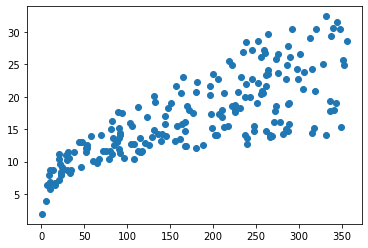

In [21]:
plt.scatter(df.youtube, df.sales)

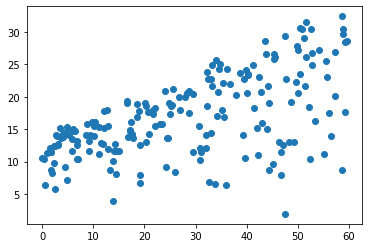

In [22]:
plt.scatter(df.facebook, df.sales)

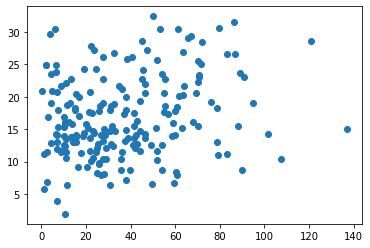

In [24]:
plt.scatter(df.newspaper, df.sales)

### Modeling

In [29]:
# Split the data into test group and train group
y = df['sales']
x = df.drop('sales', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y)

#### Model without interaction

In [33]:
df_train = x_train
df_train['sales'] = y_train

model1 = sm.OLS.from_formula('sales ~ youtube + facebook + newspaper', df_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     359.7
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           3.30e-67
Time:                        00:21:58   Log-Likelihood:                -317.13
No. Observations:                 150   AIC:                             642.3
Df Residuals:                     146   BIC:                             654.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6617      0.457      8.013      0.0

#### Model with interaction between youtube and facebook and youtube and newspaper

In [34]:
model2 = sm.OLS.from_formula('sales ~ youtube + facebook + newspaper + youtube:facebook + youtube:newspaper', df_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     783.9
Date:                Thu, 02 Jun 2022   Prob (F-statistic):          1.63e-102
Time:                        00:23:31   Log-Likelihood:                -226.17
No. Observations:                 150   AIC:                             464.3
Df Residuals:                     144   BIC:                             482.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.3423      0.38

Differences between interaction and non-interaction regression:  
   
    1. Adjusted R2 is greater for model2 with interaction. Adjusted R2 represents percentage of variation in response variable explained by predictor variable.
    2. Standard error: Lower the standard error, better the model. Model with interaction has lower standard error.  
    3. t-value means what is the standard error in the coefficient. A large t-value, relative to standard error, would provide evidence against the null hypothesis and indicate that a relationships exists between the independent and dependent variable. Predictors with low t-statistics can be dropped. Ideally, the t-value should be greater than 1.96 for a p-value to be less than 0.05.  
    4.P-value should be less than 0.05. Pr(>t) represents the p-value or the probability of observing a value larger than t.
    5. AIC, BIC is also low for second model with interaction.
    6. The F-test of overall significance indicates whether your linear regression model provides a better fit to the data than a model that contains no independent variables. The greater the F-value the better. We see that model with interaction has greater overall F-value.  
    
Hence we conclude that there is significant interaction between facebook and newspaper advertisement and Youtube ads in predicting the sales of the company.  